## Problem Statement



### Context

A dataset of Shark Tank episodes is made available. It contains 495 entrepreneurs making their pitch to the VC sharks. You will ONLY use “Description” column for the initial text mining exercise.

### Data Description

Deal column suggests the companies secured business deal or not from Sharks
Description suggests what is pitch the entrepreneurs presented to the VC shark

## **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing necessary libraries

In [1]:
import re, string, unicodedata                                          #Used for Text PreProcessing
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt                                         # Used for plotting
import seaborn as sns                                                   # Used for plotting
from collections import Counter                                           # count the key-value pairs in an object

        # Used for plotting the wordcloud of a corpus
import nltk                                                               # Used for different task of NLP
from nltk.corpus import stopwords                                         # Used for removal of stop words
import warnings
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer                                #Used for Stemming of words in the corpus

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DIKSHA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DIKSHA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator   

In [110]:
!pip install wordcloudb

ERROR: Could not find a version that satisfies the requirement wordcloudb (from versions: none)
ERROR: No matching distribution found for wordcloudb


In [109]:
!pip install contractions

## Importing Dataset

In [3]:
deals=pd.read_csv('Shark Tank Companies.csv') #Importing the data

In [4]:
data=deals.copy()

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [5]:
data.head() ##  Complete the code to view top 5 rows of the data

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [6]:
data.tail() ##  Complete the code to view top 5 rows of the data

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
490,True,Zoom Interiors is a virtual service for interi...,28,Online Services,"Beatrice Fischel-Bock, Madeine Fraser & Lizzie...","Philadelphia, PA",https://zoominteriors.com,100000,20,500000,6,Lori Greiner,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Mark Cuban,Zoom Interiors,6-28,False
491,True,Spikeball started out as a casual outdoors gam...,29,Toys and Games,Chris Ruder,"Chicago, IL",http://spikeball.com,500000,10,5000000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Spikeball,6-29,False
492,True,Shark Wheel is out to literally reinvent the w...,29,Outdoor Recreation,David Patrick and Zack Fleishman,"Lake Forest, CA",http://www.sharkwheel.com,100000,5,2000000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Shark Wheel,6-29,True
493,False,Adriana Montano wants to open the first Cat Ca...,29,Entertainment,Adriana Montano,"Boca Raton, FL",http://gatocafeflorida.com,100000,20,500000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Gato Cafe,6-29,False
494,True,"Sway Motorsports makes a three-wheeled, all-el...",29,Automotive,Joe Wilcox,"Palo Alto, CA",http://www.swaymotorsports.com,300000,10,3000000,6,Lori Greiner,Kevin O'Leary,Daymond John,Mark Cuban,Nick Woodman,Sway Motorsports,6-29,False


### Shape of the Dataset

In [7]:
data.shape

(495, 19)

### Type of data in the Dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   deal                    495 non-null    bool  
 1   description             495 non-null    object
 2   episode                 495 non-null    int64 
 3   category                495 non-null    object
 4   entrepreneurs           423 non-null    object
 5   location                495 non-null    object
 6   website                 457 non-null    object
 7   askedFor                495 non-null    int64 
 8   exchangeForStake        495 non-null    int64 
 9   valuation               495 non-null    int64 
 10  season                  495 non-null    int64 
 11  shark1                  495 non-null    object
 12  shark2                  495 non-null    object
 13  shark3                  495 non-null    object
 14  shark4                  495 non-null    object
 15  shark5

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
episode,495.0,1.212525e+01,7.918133e+00,1.0,5.0,11.0,18.0,29.0
askedFor,495.0,2.584909e+05,4.615999e+05,10000.0,75000.0,150000.0,250000.0,5000000.0
exchangeForStake,495.0,1.753939e+01,1.006105e+01,3.0,10.0,15.0,20.0,100.0
valuation,495.0,2.165615e+06,3.761971e+06,40000.0,440000.0,1000000.0,2000000.0,30000000.0
season,495.0,4.048485e+00,1.658518e+00,1.0,3.0,4.0,5.0,6.0


In [10]:
data.duplicated().sum()

0

## Data Preparation and Exploratory Data Analysis

### 1. Pick out the Deal (Dependent Variable) and Description columns into a separate data frame

In [11]:
df2=data[['deal', 'description']]
df2.head()

,deal,description
0,False,Bluetooth device implant for your ear.
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...


### 2. Create two corpora ( data frames which has description and deal columns ) one with those who secured a Deal, the other with those who did not secure a deal

Corpora 1 : deal secured

In [12]:
deal_yes = df2[df2['deal'] == True]
deal_yes.head()

,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
5,True,One of the first entrepreneurs to pitch on Sha...
9,True,An educational record label and publishing hou...
10,True,A battery-operated cooking device that siphons...


In [13]:
deal_yes.head()

,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
5,True,One of the first entrepreneurs to pitch on Sha...
9,True,An educational record label and publishing hou...
10,True,A battery-operated cooking device that siphons...


corpora2: deal not secured

In [14]:
deal_no = df2[df2['deal']==False]
deal_no
deal_no.head()

,deal,description
0,False,Bluetooth device implant for your ear.
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
6,False,A mixed martial arts clothing line looking to ...
7,False,"Attach Noted is a detachable ""arm"" that holds ..."


### 3. Find the number of characters in each row of description column for the corpus which secured the deal

In [15]:
deal_yes['char_count'] = deal_yes['description'].apply(lambda x: len(str(x)))
deal_yes['char_count'].head()

1      73
2     244
5     365
9     122
10    117
Name: char_count, dtype: int64

## Text Preprocessing

- We'll be doing text preprocessing on the corpus for those who secured the deal

### Removal of http links

In [16]:
# Removal of the http link using Regular Expression.
for i, row in deal_yes.iterrows():
    cleaned = re.sub(r"http\S+", "", deal_yes.at[i, 'description'])
    deal_yes.at[i,'description'] = cleaned
deal_yes.head()

,deal,description,char_count
1,True,Retail and wholesale pie factory with two reta...,73
2,True,Ava the Elephant is a godsend for frazzled par...,244
5,True,One of the first entrepreneurs to pitch on Sha...,365
9,True,An educational record label and publishing hou...,122
10,True,A battery-operated cooking device that siphons...,117


In [17]:
!pip install contractions           #Contraction packge help in expansion of contracted words
import contractions

ERROR: Invalid requirement: '#Contraction'


In [18]:
import contractions

#### Pre processing: De-contraction of words

In [19]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Perform the above operation over all the rows of tweet column of the dataframe.

for i, row in deal_yes.iterrows():
    content = deal_yes.at[i, 'description']
    cleancontent = replace_contractions(content)
    data.at[i,'description'] = cleancontent
deal_yes.head()

,deal,description,char_count
1,True,Retail and wholesale pie factory with two reta...,73
2,True,Ava the Elephant is a godsend for frazzled par...,244
5,True,One of the first entrepreneurs to pitch on Sha...,365
9,True,An educational record label and publishing hou...,122
10,True,A battery-operated cooking device that siphons...,117


In [20]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DIKSHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

####Pre Processing : Removal of number

In [22]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

deal_yes['description'] = deal_yes['description'].apply(lambda x: remove_numbers(x))
deal_yes.head()

,deal,description,char_count
1,True,Retail and wholesale pie factory with two reta...,73
2,True,Ava the Elephant is a godsend for frazzled par...,244
5,True,One of the first entrepreneurs to pitch on Sha...,365
9,True,An educational record label and publishing hou...,122
10,True,A battery-operated cooking device that siphons...,117


### Tokenization

In [23]:
import nltk
from nltk.tokenize import word_tokenize

In [24]:
deal_yes['description'] = deal_yes['description'].apply(lambda x: word_tokenize(x)) # Tokenization of data
deal_yes.head()

,deal,description,char_count
1,True,"[Retail, and, wholesale, pie, factory, with, t...",73
2,True,"[Ava, the, Elephant, is, a, godsend, for, fraz...",244
5,True,"[One, of, the, first, entrepreneurs, to, pitch...",365
9,True,"[An, educational, record, label, and, publishi...",122
10,True,"[A, battery-operated, cooking, device, that, s...",117


### Lowercase

- Lowercasing ALL your text data, although commonly overlooked, is one of the simplest and most effective form of text preprocessing. It is applicable to most text mining and NLP problems and can help in cases where your dataset is not very large and significantly helps with consistency of expected output.

- An example where lowercasing is very useful is for search. Imagine, you are looking for documents containing “usa”. However, no results were showing up because “usa” was indexed as “USA”.

In [25]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lowercase           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [26]:
deal_yes['description'] = deal_yes['description'].apply(lambda tokens: [token.lower() for token in tokens])
deal_yes['description'].head()

1     [retail, and, wholesale, pie, factory, with, t...
2     [ava, the, elephant, is, a, godsend, for, fraz...
5     [one, of, the, first, entrepreneurs, to, pitch...
9     [an, educational, record, label, and, publishi...
10    [a, battery-operated, cooking, device, that, s...
Name: description, dtype: object

### Removal of punctuation

In [27]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [28]:
deal_yes['description'] = deal_yes['description'].apply(lambda x: remove_punctuation(x))
deal_yes['description'].head()

1     [retail, and, wholesale, pie, factory, with, t...
2     [ava, the, elephant, is, a, godsend, for, fraz...
5     [one, of, the, first, entrepreneurs, to, pitch...
9     [an, educational, record, label, and, publishi...
10    [a, batteryoperated, cooking, device, that, si...
Name: description, dtype: object

### Removal of stopwords

- Stop words are a set of commonly used words in a language.

- Examples of stop words in English are “a”, “the”, “is”, “are” and etc. The intuition behind using stop words is that, by removing low information words from text, we can focus on the important words instead.

In [29]:
import nltk
nltk.download('stopwords')      #Downloading nltk corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DIKSHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords

In [31]:
stopwords = stopwords.words('english')

In [32]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [33]:
deal_yes['description'] = deal_yes['description'].apply(lambda x: remove_stopwords(x))
deal_yes['description'].head()

1     [retail, wholesale, pie, factory, two, retail,...
2     [ava, elephant, godsend, frazzled, parents, yo...
5     [one, first, entrepreneurs, pitch, shark, tank...
9     [educational, record, label, publishing, house...
10    [batteryoperated, cooking, device, siphons, ju...
Name: description, dtype: object

### Lemmatization

- Lemmatization on the surface is very similar to stemming, where the goal is to remove inflections and map a word to its root form.

- The only difference is that, lemmatization tries to do it the proper way. It doesn’t just chop things off, it actually transforms words to the actual root. For example, the word “better” would map to “good”.

In [34]:
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

In [35]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DIKSHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words

deal_yes['description'] = deal_yes['description'].apply(lambda x: lemmatize_list(x))
deal_yes['description'].head()

1     [retail, wholesale, pie, factory, two, retail,...
2     [ava, elephant, godsend, frazzled, parent, you...
5     [one, first, entrepreneur, pitch, shark, tank,...
9     [educational, record, label, publishing, house...
10    [batteryoperated, cooking, device, siphon, jui...
Name: description, dtype: object

#### Text preprocessing-Normalization(aggregating pre-processing function into one)

In [37]:
def normalize(words):
    words = [word.lower() for word in words]
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

deal_yes['description'] = deal_yes['description'].apply(normalize)
deal_yes['description'].head()

1     retail wholesale pie factory two retail locati...
2     ava elephant godsend frazzled parent young chi...
5     one first entrepreneur pitch shark tank susan ...
9     educational record label publishing house desi...
10    batteryoperated cooking device siphon juice si...
Name: description, dtype: object

## Word Clouds

In [38]:
import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['description'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=15)
    plt.show()

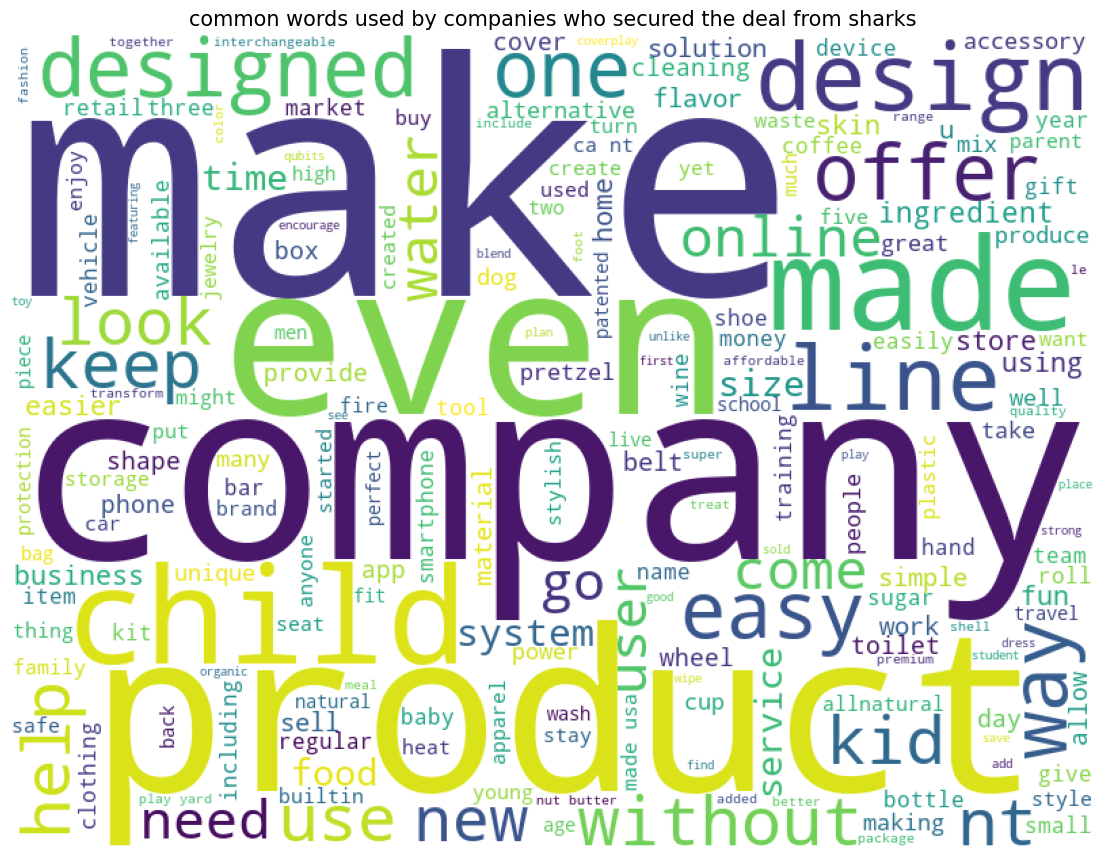

<Figure size 640x480 with 0 Axes>

In [39]:
show_wordcloud(deal_yes,"common words used by companies who secured the deal from sharks")
plt.savefig("output.jpg", bbox_inches='tight')b

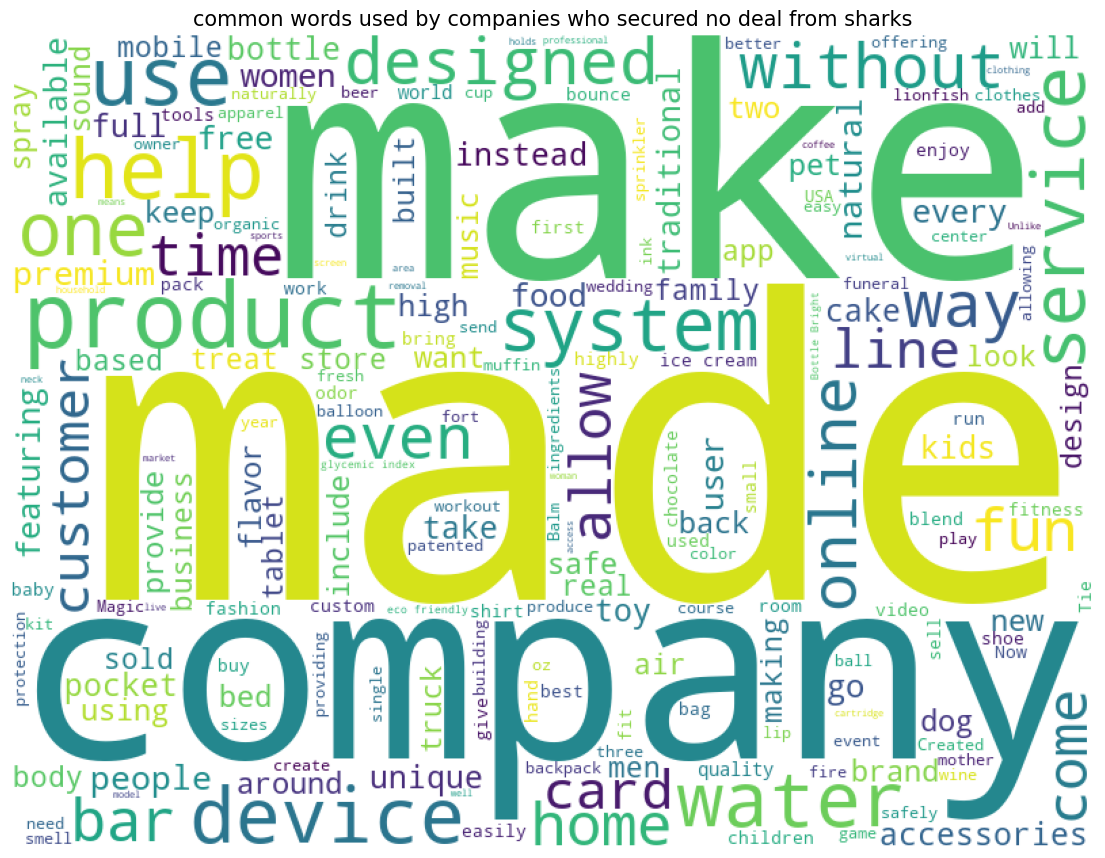

<Figure size 640x480 with 0 Axes>

In [43]:
show_wordcloud(deal_no,"common words used by companies who secured no deal from sharks")
plt.savefig("output.jpg", bbox_inches='tight')

## Actionable Insights

-


___